In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

from random import choice
from utils import *

In [2]:
DATADIR = os.path.join("data", "clean")

x_train = pd.read_pickle(os.path.join(DATADIR, "clean_x_train.pkl"))
x_test = pd.read_pickle(os.path.join(DATADIR, "clean_x_test.pkl"))
y_train = pd.read_pickle(os.path.join(DATADIR, "clean_y_train.pkl"))
y_test = pd.read_pickle(os.path.join(DATADIR, "clean_y_test.pkl"))

with open(os.path.join(DATADIR, "posterior_samples.pkl"), "rb") as infile:
    posterior_samples = pickle.load(infile)

with open(os.path.join(DATADIR, "prior_samples.pkl"), "rb") as infile:
    prior_samples = pickle.load(infile)

with open(os.path.join(DATADIR, "posterior_samples_fitted.pkl"), "rb") as infile:
    fitted_samples = pickle.load(infile)

with open(os.path.join(DATADIR, "posterior_predict_samples.pkl"), "rb") as infile:
    predicted_samples = pickle.load(infile)



dim0_label = "Cholesterol"
dim1_label = "MaxHR"

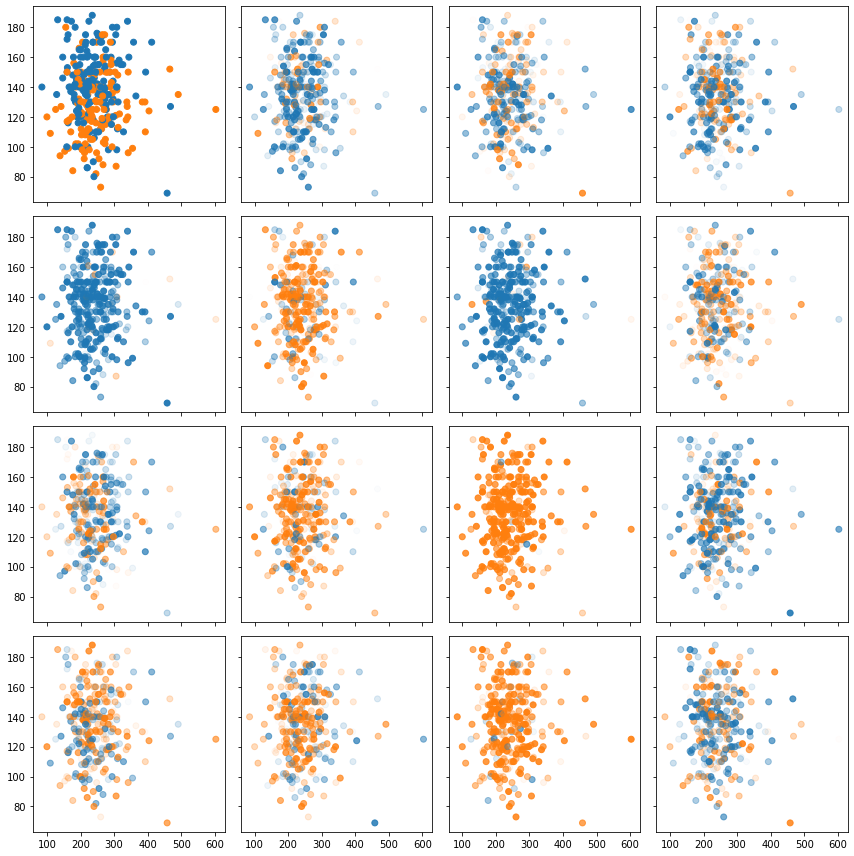

In [3]:
prior_comparison = compare_samples_with_original(x_train, y_train, prior_samples, plot_proba = True)

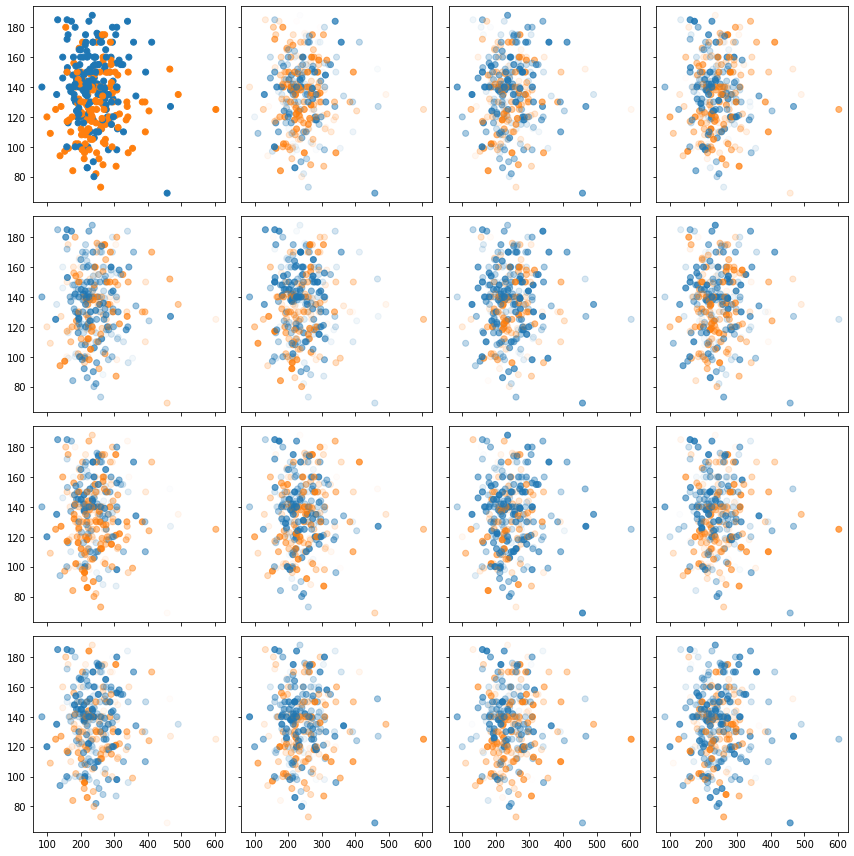

In [4]:
posterior_comparison = compare_samples_with_original(x_train, y_train, posterior_samples, plot_proba = True)

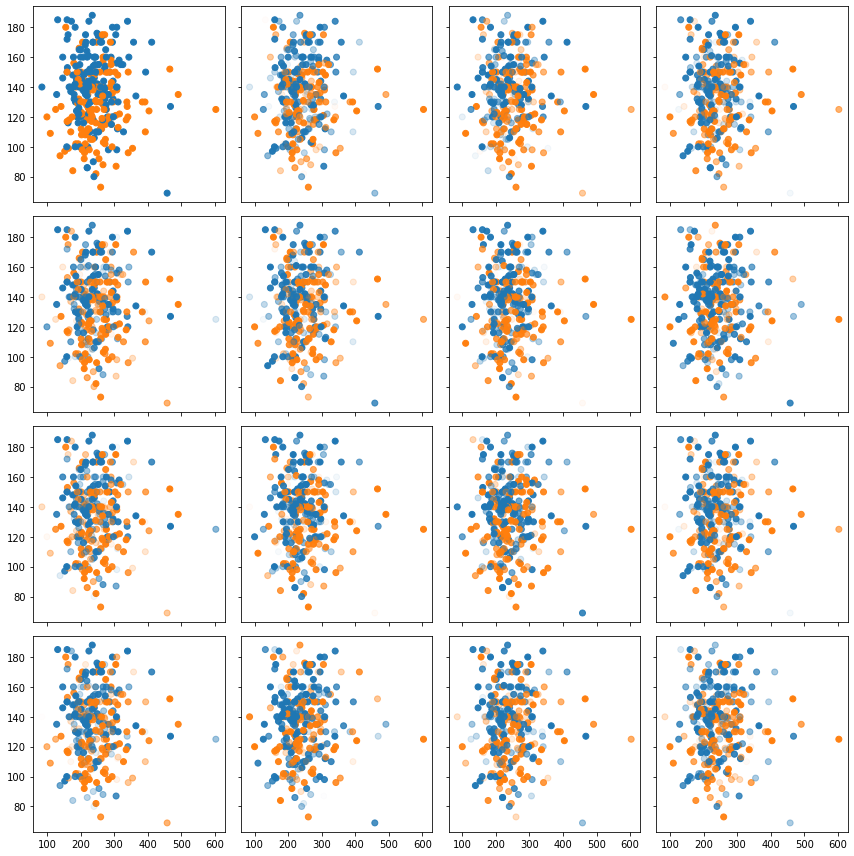

In [5]:
fitted_comparison = compare_samples_with_original(x_train, y_train, fitted_samples, plot_proba=True)

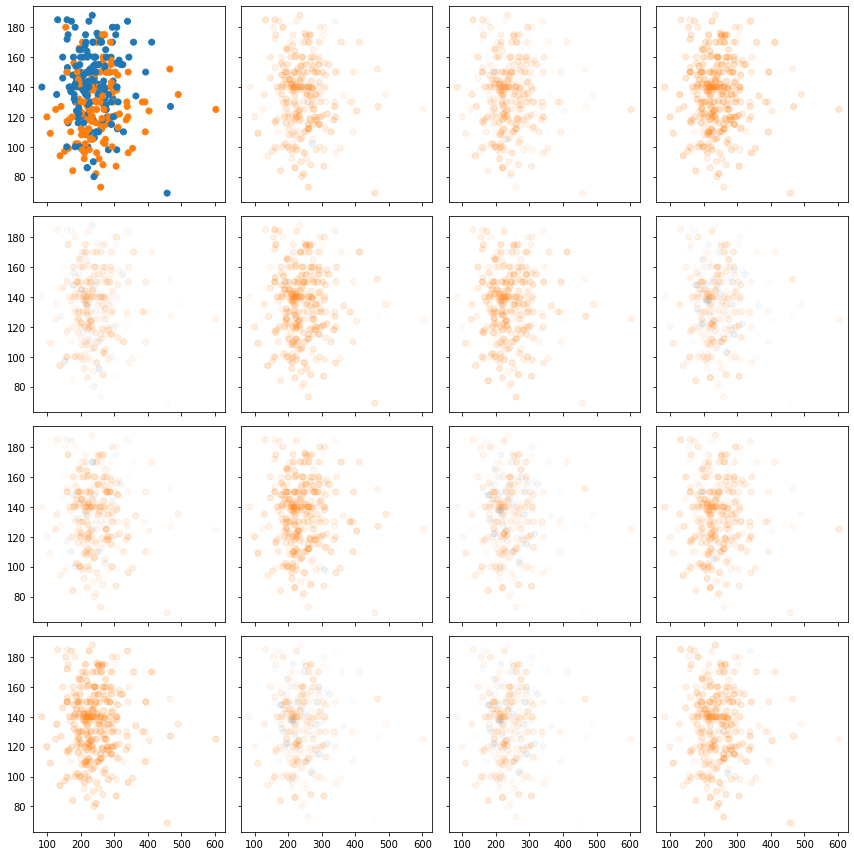

In [6]:
prior_mean_fig = plot_mean_samples(x_train, y_train, prior_samples)

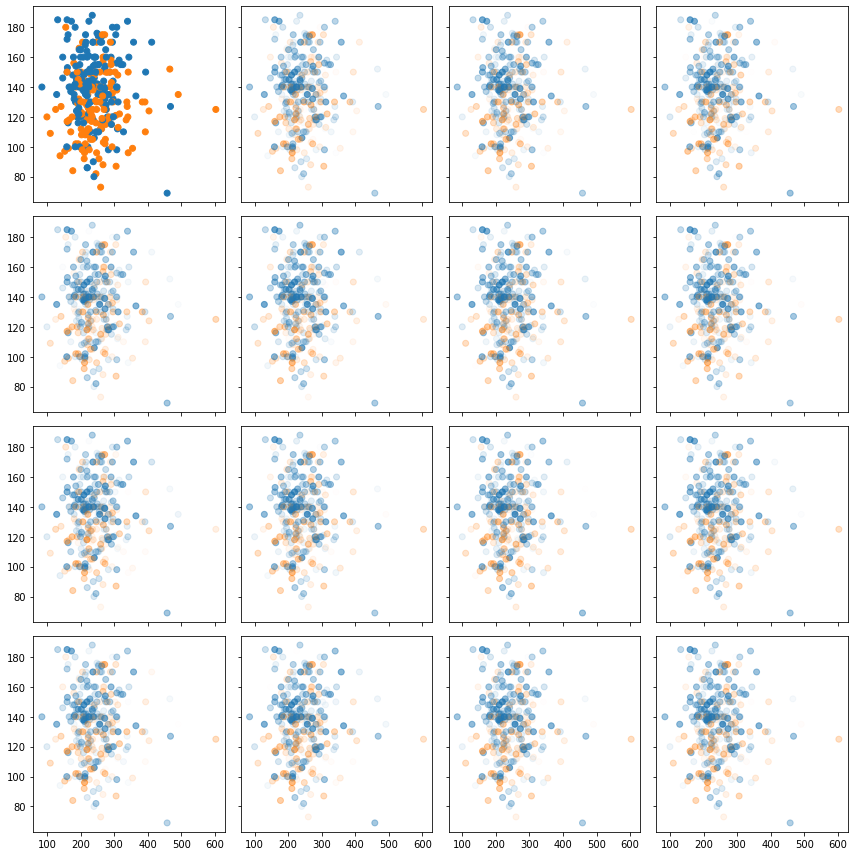

In [7]:
posterior_mean_fig = plot_mean_samples(x_train, y_train, posterior_samples, plot_proba=True)

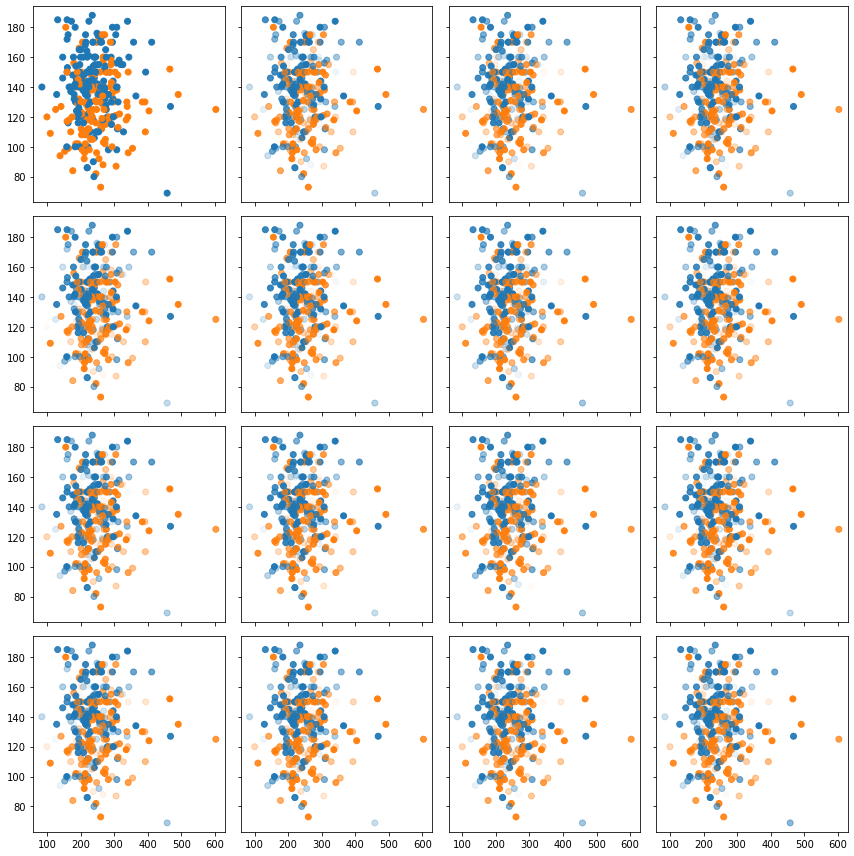

In [8]:
fitted_mean_fig = plot_mean_samples(x_train, y_train, fitted_samples)

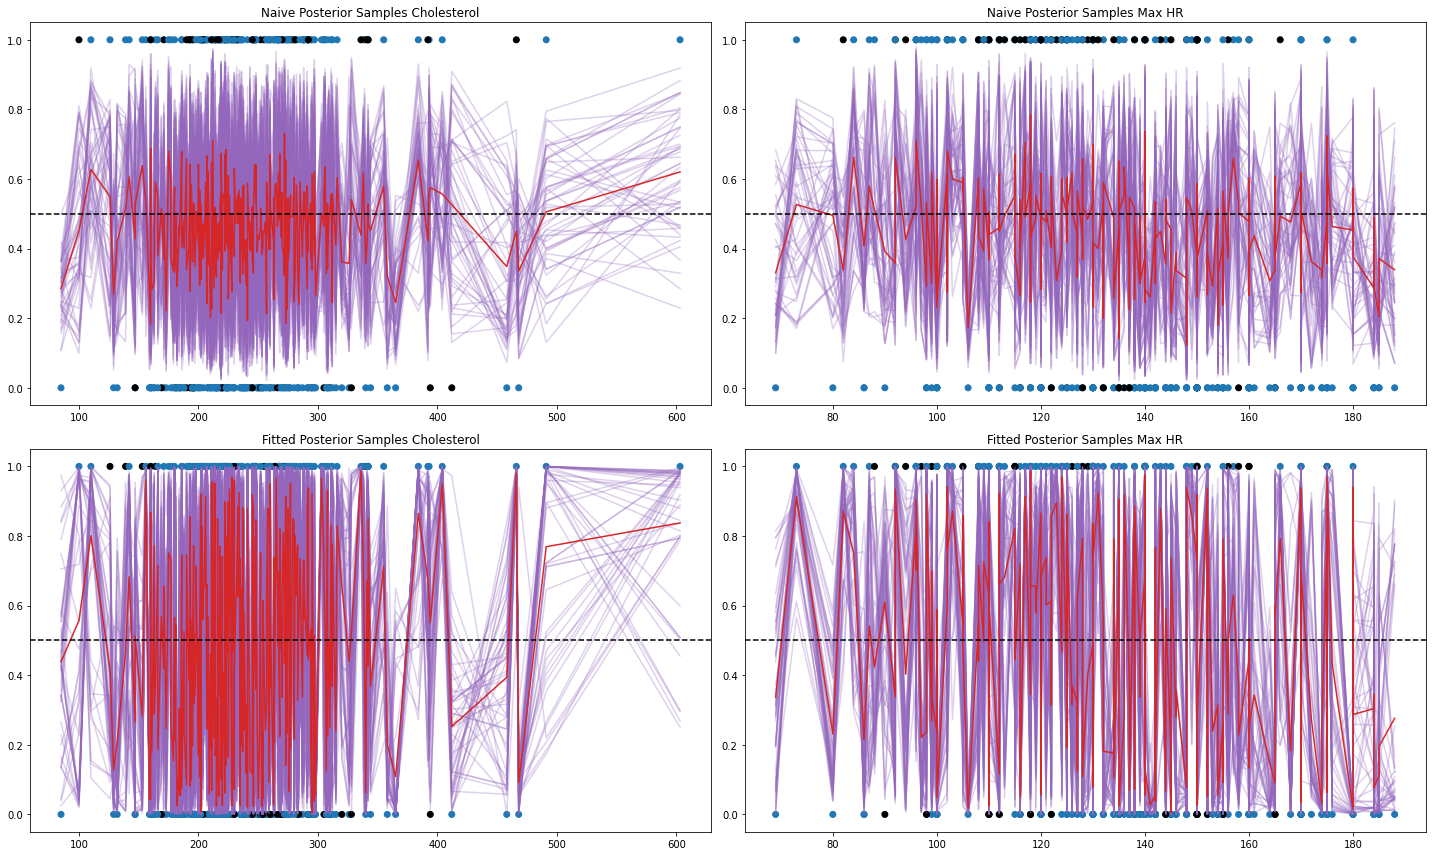

In [9]:
titles = [" ".join(strings) for strings in itertools.product(["Naive Posterior Samples", "Fitted Posterior Samples"], ["Cholesterol", "Max HR"])]
fig, axs = plt.subplots(2, 2, figsize=(20, 12), tight_layout=True)
for (sample, dim), title, ax in zip(itertools.product([posterior_samples, fitted_samples], [0, 1]), titles, axs.ravel()):
    plot_1d(dim, x_train, y_train, sample, ax, title=title)
    

Here we take a look at our predictions for the test set. We plot a couple point predictions by taking a 200 draws from the fitted posterior and taking their mean. Notice here that the predictions are not actually that good. We make many wrong predictions and it is not uncertain as much as we would like when it is wrong.

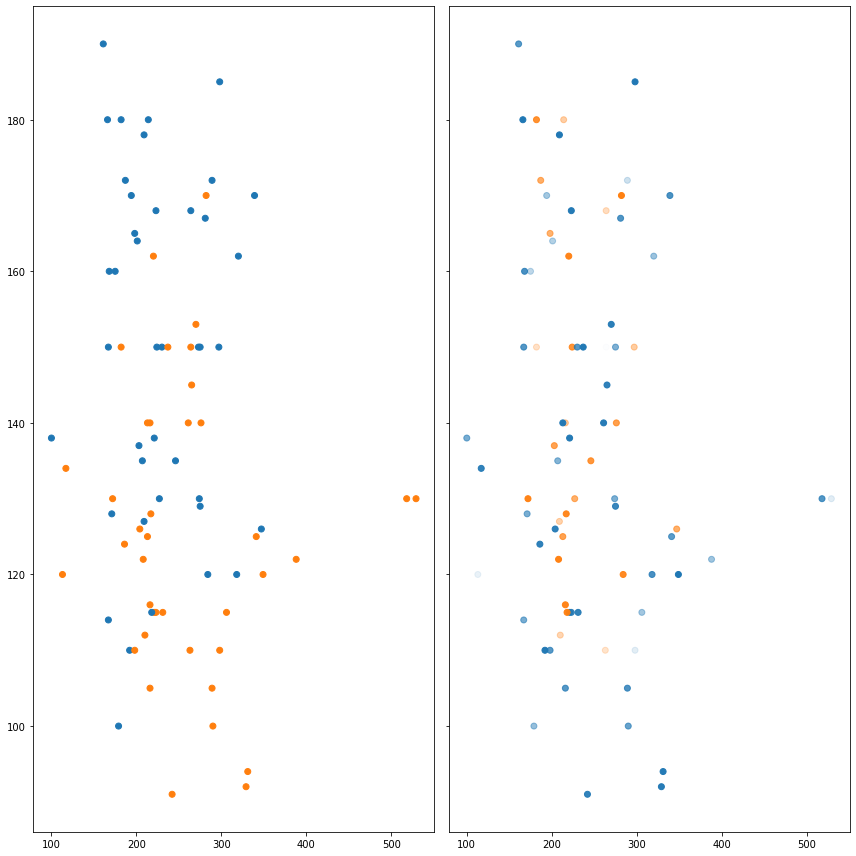

In [14]:
predictions = predicted_samples[:,len(x_train):]
predictions_fig = plot_mean_samples(x_test, y_test, predictions, sample_size=200, nrow=1, ncol=2)

Here we plot the posterior predictions against each axis univariately to try to get a better idea. We can see here that the model is simply fairly uncertain for a lot of the predictions. This would indicate that we woulld want to rethink about our modelling choices by choosing a kernel or combination of kernels that could better deal with the high degree of overlap in the two classes and the central noisy regions, because although the problem is hard to predict, there is a clear structure when considering these two features of the data together and the model, although able to fit it in the training data is unable to prevent itself from overfitting because it is unable to quantify the right amount of noise through the white noise kernel as we had hoped. We would also want to find more features that could give us better separation in the data to make the problem easier. 

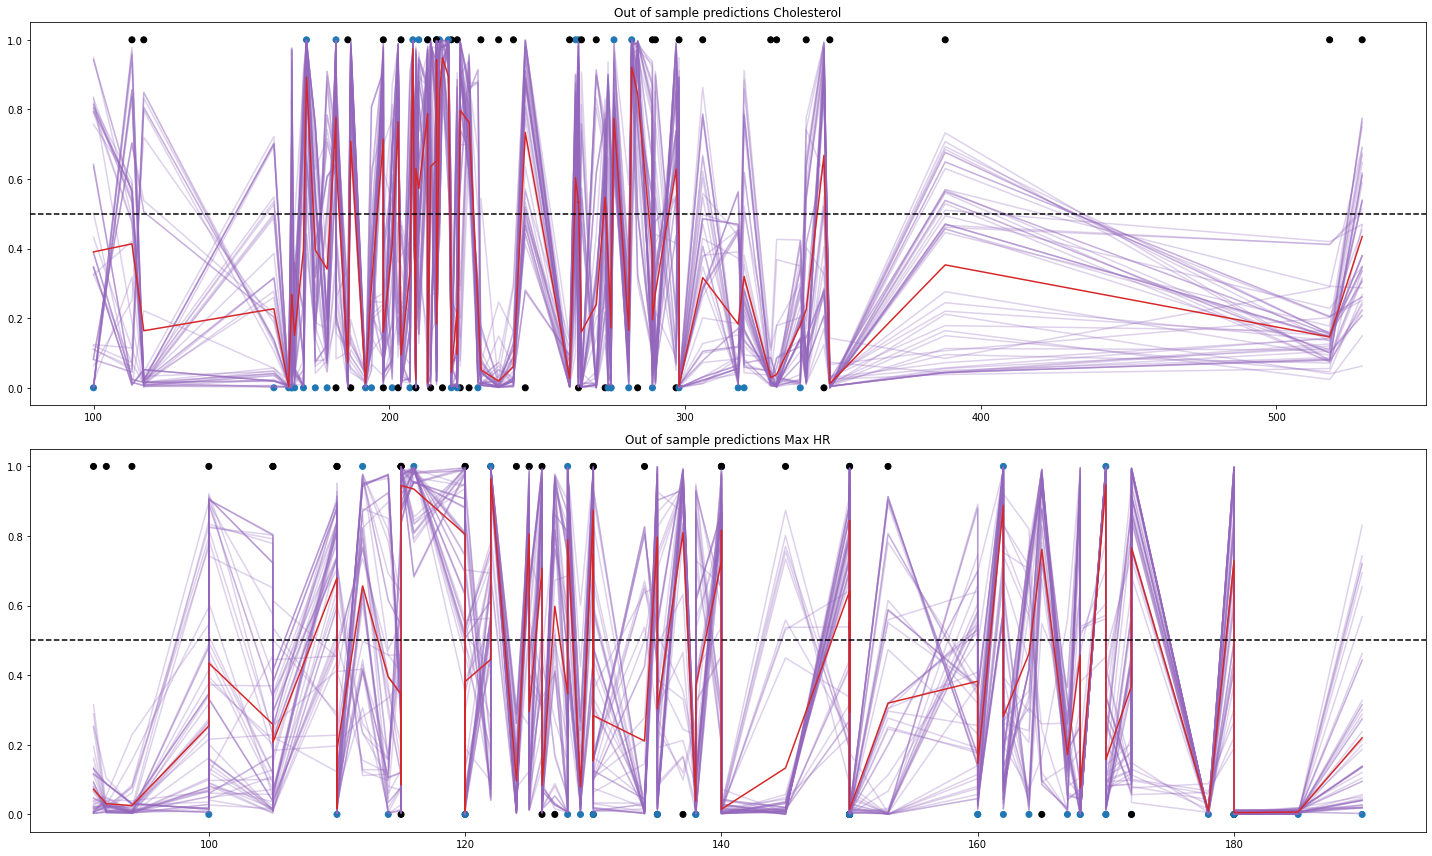

In [13]:
titles = [" ".join(strings) for strings in itertools.product(["Out of sample predictions"], ["Cholesterol", "Max HR"])]
fig, axs = plt.subplots(2, 1, figsize=(20, 12), tight_layout=True)
for (sample, dim), title, ax in zip(itertools.product([predictions], [0, 1]), titles, axs.ravel()):
    plot_1d(dim, x_test, y_test, sample, ax, title=title)
    